In [3]:
from queue import Queue
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
# from scipy import ndimage
import matplotlib.pyplot as plt
from utils import *
from environment import *
from agent import *
import io
import cv2
import random
from tqdm.notebook import tqdm
from geneticalg import GeneticAlgorithm
import copy
import pickle

In [62]:
# results_string_name = "GA_5RandomAgent_0.1elitism_0.1mutation_40food_20blocks"
results_string_name = "GA_5SwarmAgent_0.1elitism_0.1mutation_40food_20blocks"

pickle_file = open("Pickled/" + results_string_name, "rb")
pickle_dict = pickle.load(pickle_file)
grids = pickle_dict['grids']
fitness_values = pickle_dict['fitness values']
env_params = pickle_dict['env_params']

In [63]:
i = 0 # iteration number for grid of interest
n = 0 # number within iteration pool for grid of interest
num_agents = 5 # num agents


Fitness: -5.2


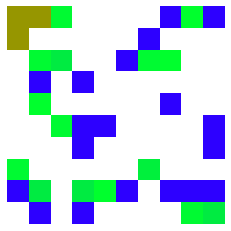

In [64]:
# Visualize a grid of interest
%matplotlib inline

p = grids[i][n]
pp = process_grids((np.zeros_like(p), p, np.zeros_like(p)), env_params)
to_replace = np.where((pp[0] == [0,0,0]).all(axis=2))
pp[0][to_replace] = pp[1][to_replace]
plt.imshow(pp[0].astype('uint8'))
plt.axis('off')
print("Fitness: " + str(fitness_values[i][n]))

In [67]:
# Run simulation on a grid of interest
env = Environment(env_params, grid = grids[i][n])

# testAgents = [SwarmAgent(i, env_params, env.spt) for i in range(num_agents)]
test_agents = [DQNAgent(i, env_params, net_filepath="DQN/target_net.pt") for i in range(5)]
food_collected, env_observations = env.run_episode(testAgents, visualize = True)
print(food_collected)

grid
 3.0 3.0 0.0 0.0 0.0 0.0 0.0 4.0 6.0 4.0
 3.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0
 0.0 4.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0
 0.0 0.0 0.0 4.0 4.0 0.0 0.0 0.0 0.0 4.0
 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 4.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 4.0 0.0 0.0 6.0 6.0 4.0 0.0 4.0 4.0 4.0
 0.0 4.0 0.0 4.0 0.0 0.0 0.0 0.0 7.010.0
static
 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
30


<IPython.core.display.Javascript object>


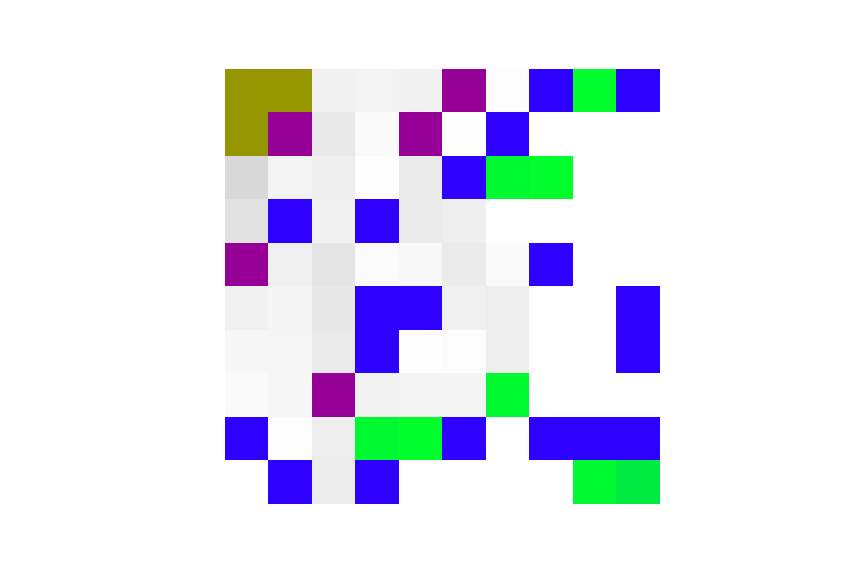

In [68]:
%matplotlib notebook
# View simulation
# https://stackoverflow.com/questions/10429556/animate-quadratic-grid-changes-matshow

def set_frame(obs, env_params, update_mat = True):
    pp = process_grids(obs, env_params)
    to_replace = np.where((pp[0] == [0,0,0]).all(axis=2))
    pp[0][to_replace] = pp[1][to_replace]
    if update_mat:
        mat.set_data(pp[0].astype('uint8'))
    return pp[0].astype('uint8') 

fig, ax = plt.subplots()
mat = ax.matshow(set_frame(env_observations[0], env_params, update_mat = False))
ani = animation.FuncAnimation(fig, set_frame, env_observations, interval=20,
                              save_count=50, blit = True, fargs = (env_params,))
plt.axis('off')
plt.show() 

In [69]:
gif_name = results_string_name + "_iter" + str(i) + "_n" + str(n) + ".gif"

# "GA_5RandomAgent_0.1elitism_0.1mutation_40food_20blocks_iter90_n55.gif"

def save_as_gif(env_observations, env_params, output_filename, to_size = (50, 50), frame_len = 50):
    images = []
    for obs in env_observations:
        img_arr = set_frame(obs, env_params, update_mat = False)
        images.append(Image.fromarray(img_arr).resize(to_size, resample = Image.BOX))

    print("Saving as GIF...")
    images[0].save(output_filename,
                       save_all=True, append_images=images[1:], optimize=True, duration=frame_len, loop=0, lossless=True)

    print("Your file", output_filename, "has been saved!")
    
    
save_as_gif(env_observations, env_params, gif_name, to_size = (100, 100))

Saving as GIF...
Your file GA_5SwarmAgent_0.1elitism_0.1mutation_40food_20blocks_iter0_n0.gif has been saved!


In [8]:
env_params

{'coding_dict': {'empty': 0,
  'agent': 1,
  'bounds': 2,
  'hive': 3,
  'blockade': 4,
  'food_start': 6},
 'N': 10,
 'M': 10,
 'max_food': 5,
 'observation_radius': 1,
 'steps': 300,
 'spawn_rate': 2,
 'pheromone': {'evaporation': 0.05,
  'diffusion': 0.1,
  'step': 0.1,
  'step_if_food': 0.3,
  'cap': 5},
 'grid': {'food': 40, 'blockade': 20},
 'env_actions': [(0, 0), (0, -1), (0, 1), (1, 0), (-1, 0)],
 'rgb_coding': {0: [0, 0, 0],
  1: [150, 0, 150],
  2: [100, 100, 100],
  3: [150, 150, 0],
  4: [45, 0, 255],
  6: [0, 255, 45],
  7: (0, 250, 50),
  8: (0, 245, 55),
  9: (0, 240, 60),
  10: (0, 235, 65),
  11: (0, 230, 70),
  12: (0, 225, 75),
  13: (0, 220, 80),
  14: (0, 215, 85),
  15: (0, 210, 90)}}